In [20]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# O2 flux

##### RUN:
/data/tjarniko/results/03sep19_SSC_newdir
##### DATE:  Jan17_2019
##### description of point: 

calculate intermediate calculations for oxygen flux. 
check units/check that numbers make sense with literature



In [21]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [22]:
#import all the things

import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np
import cmocean as cm
from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools)
import xarray as xr 
import subprocess 
import cmocean
from matplotlib import reload
import glob
import netCDF4 as nc
import VIZ_plots as VP

%matplotlib inline

Oxygen is exchanged with the atmosphere using the parameterization
of Wanninkhof (1992) to compute the gas exchange
coefficient. The atmospheric concentration of oxygen
is constant over time and space and cannot be specified by
the user. As for CO2, no air–sea fluxes are allowed when the
ocean is covered by sea ice (see Eq. 82).

In [23]:
reload(VP)

<module 'VIZ_plots' from '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/MOCSY_and_FLUX/VIZ_plots.py'>

#### Available functions from VP

    two_panel_plot(surfdat_1,surfdat_2,tit1,tit2,t_cmap,xsize,ysize,vmin,vmax,clabel,bigtit)
    animate_surf(hrly_dat,tit,v_min,v_max,t_cmap)

In [24]:
resdir = '/data/tjarniko/results/03sep19_SSC_newdir/'
ptrc = 'SKOG_1ts_20141121_20141121_carp_T_20141121-20141121.nc'
grid = 'SKOG_1ts_20141121_20141121_grid_T_20141121-20141121.nc'
tracers = nc.Dataset(resdir + ptrc)
tracersp = nc.Dataset(resdir + grid)
#print(tracers)
# print(tracersp)

In [25]:
#chemo2 = tracers.variables['of_chemo2'][0,:,:]
#zkgo2 = tracers.variables['of_zkgo2'][0,:,:]
#patm = tracers.variables['of_patm'][0,:,:]
o2_surf = tracers.variables['dissolved_oxygen'][0,0,:,:]
#oce_o2 = tracers.variables['oce_o2'][0,:,:]
#wm = tracers.variables['wind_mag'][0,:,:]
sal = tracersp.variables['vosaline'][0,0,:,:]
temp = tracersp.variables['votemper'][0,0,:,:]

resdir2 = '/data/tjarniko/results/20aug19_writeout_oxydiag_uncomm_zkgwan_writeout_windmag/'
ptrc = 'SKOG_1ts_20141121_20141121_carp_T_20141121-20141121.nc'
grid = 'SKOG_1ts_20141121_20141121_grid_T_20141121-20141121.nc'
tracers2 = nc.Dataset(resdir2 + ptrc)

o2_surf_aug20 = tracers2.variables['dissolved_oxygen'][0,0,:,:]

In [26]:
# print('chemo2')
# print(np.min(chemo2))
# print(np.max(chemo2))
# print('zkgo2')
# print(np.min(zkgo2))
# print(np.max(zkgo2))

In [27]:

# print('patm')
# print(np.min(patm))
# print(np.max(patm))
# print('oce_o2')
# print(np.min(oce_o2))
# print(np.max(oce_o2))
print('o2_surf')
print(np.min(o2_surf))
print(np.max(o2_surf))
print('o2_surf')
print(np.min(o2_surf_aug20))
print(np.max(o2_surf_aug20))
# print('wind_mag')
# print(np.min(wm))
# print(np.max(wm))


o2_surf
0.0
475.1812
o2_surf
0.0
475.1812


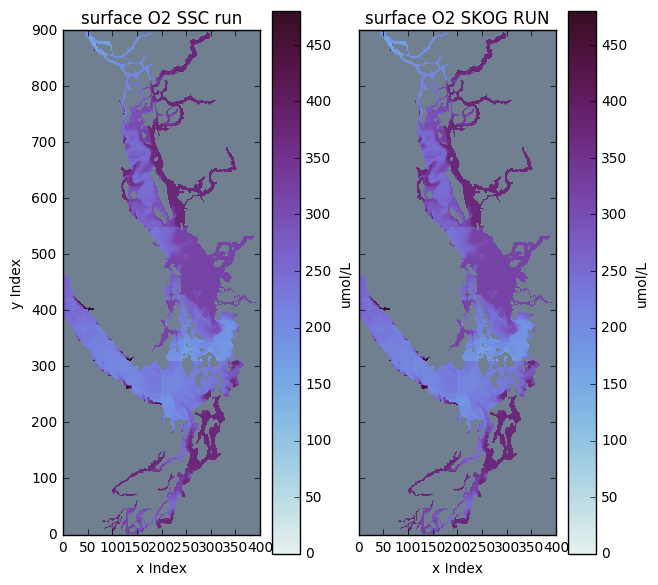

In [ ]:
VP.two_panel_plot(o2_surf,o2_surf_aug20,'surface O2 SSC run','surface O2 SKOG RUN',\
                  cm.cm.dense,7,7,0,480,0,480,'umol/L','umol/L','')


In [ ]:
VP.two_panel_plot(o2_surf-o2_surf_aug20,o2_surf-o2_surf_aug20,'SKOG - SSC run','SKOG - SSC run',\
                  cm.cm.dense,7,7,-10,10,-10,10,'umol/L','umol/L','')


In [ ]:
np.nanmax(o2_surf-o2_surf_aug20)
np.nanmin(o2_surf-o2_surf_aug20)

In [ ]:
# VP.two_panel_plot(chemo2,oce_o2,'o2 solubility chemo2','o2 flux',\
#                   cm.cm.balance,7,7,.000235,.00036,-0.014,0.014,'mol/(L atm)','(mol/L) * (m/s)','')

In [ ]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bathy = mesh.variables['Bathymetry'][:]

itt = [50,250,250,150]
jtt = [375,250,500,670]
wtt = ['A','B','C','D']
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(bathy, cmap=cmocean.cm.dense, vmin = 0, vmax = 1000)
for w in range(0,len(wtt)):

        ax.plot(itt[w],jtt[w],'r.',markersize=10)
        ax.text(itt[w]+4,jtt[w]+4,wtt[w],fontsize=15,weight='bold')

In [ ]:
#o2 conc, temp, sal, schmidt number, wind mag, pist_vel, 
itt = [50.0,250.0,250,150]
jtt = [375,250,500,670]
temptt = np.zeros_like(itt)
saltt = np.zeros_like(itt)
windtt = np.zeros_like(itt)
schtt = np.zeros_like(itt)
pisttt= np.zeros_like(itt)
o2_conc = np.zeros_like(itt)
o2_sol  = np.zeros_like(itt)
o2_flx = np.zeros_like(itt)
itt = [50,250,250,150]

for w in range(0,len(itt)):
    temptt[w] = temp[jtt[w],itt[w]]
    saltt[w]= sal[jtt[w],itt[w]]
    windtt[w]= wm[jtt[w],itt[w]]
    ztc = temptt[w]
    sc_o2  = 1920.4 - 135.6  * ztc + 5.2122 * ztc**2 - 0.109390 * ztc**3 + 0.0009377 * ztc**4
    schtt[w] = sc_o2
    pisttt[w] = zkgo2[jtt[w],itt[w]]
    o2_sol[w] = chemo2[jtt[w],itt[w]]
    o2_flx[w] = oce_o2[jtt[w],itt[w]]
    o2_conc[w] = o2_surf[jtt[w],itt[w]]


In [ ]:
print(pisttt)

In [ ]:
import pandas as pd


dataset = pd.DataFrame({'i':itt,'j':jtt,'temp (C)':temptt,\
                        'sal':saltt,'schmidt':schtt,'wind (m/s)':windtt,\
                       'pist.vel.(m/s)':pisttt,'o2 sol (mol/(L atm))':o2_sol,\
                        'o2 flux (mmol/L) * (m/s)':o2_flx,'surface o2 (umol/L)':o2_conc})
print(dataset)
